In [24]:
# Import libraries
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [25]:
# Specify the path to your image folders
image_folder = "dataset-shoes-ai-generated-main"

# Initialize empty lists to store images and their corresponding labels
images = []
labels = []

# Iterate through subfolders (classes)
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                # Open and load the image
                with Image.open(image_path) as img:
                    # Convert the image to a NumPy array
                    img_array = np.array(img)
                    # Append the image array to the list of images
                    images.append(img_array)
                    # Append the label corresponding to the folder
                    labels.append(class_name)
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert the lists of images and labels into NumPy arrays
images_array = np.array(images)
labels_array = np.array(labels)

# Print the shapes of the resulting arrays
print("Shape of images array:", images_array.shape)
print("Shape of labels array:", labels_array.shape)

Shape of images array: (2181, 240, 240, 3)
Shape of labels array: (2181,)


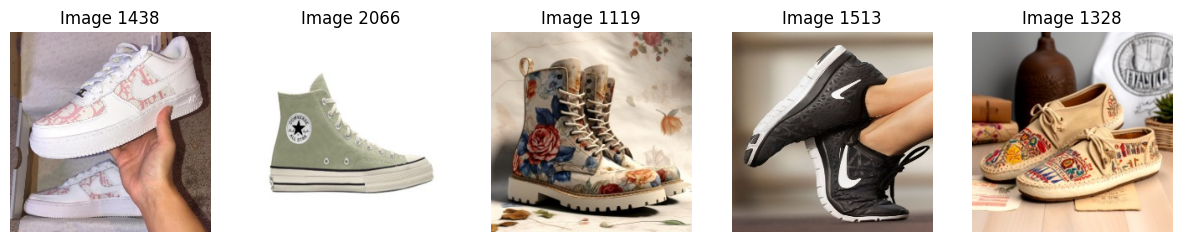

In [26]:
# show five random images

indices = np.random.choice(range(len(images_array)), 5)

# Create a figure to display the images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# For each index, display the corresponding image
for i, index in enumerate(indices):
    axes[i].imshow(images_array[index])
    axes[i].set_title(f"Image {index}")
    axes[i].axis('off')

plt.show()

In [27]:
# Transform the labels of folder name into binary representations
binary_labels = []

for x in labels_array:
    if x == 'ai-midjourney':
        binary_labels.append(0)
    else:
         binary_labels.append(1)

binary_labels = np.array(binary_labels)

# Split the data into training and testing sets
images_train, images_test, labels_train, labels_test = train_test_split(images_array, binary_labels, test_size=0.2, random_state=42)

In [28]:
# Define a CNN model using Keras
model = tf.keras.Sequential([
    tf.keras.Input(shape=(240, 240, 3)),
    layers.Conv2D(3, (3, 3), activation='relu'),    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(3, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

# Show the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 238, 238, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 119, 119, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 117, 117, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 58, 58, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10092)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     5,167,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,299,369 (20.22 MB)

 Trainable params: 5,299,369 (20.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
model.compile(optimizer='Adam',loss= 'binary_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(images_train, labels_train, validation_data=(images_test, labels_test), epochs=20, shuffle=True)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.5520 - loss: 113.6041 - val_accuracy: 0.6522 - val_loss: 1.6895
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.5759 - loss: 2.7067 - val_accuracy: 0.7689 - val_loss: 0.5147
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.7408 - loss: 0.6303 - val_accuracy: 0.8352 - val_loss: 0.4269
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8830 - loss: 0.3378 - val_accuracy: 0.8444 - val_loss: 0.4008
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9326 - loss: 0.1936 - val_accuracy: 0.8513 - val_loss: 0.4504
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9606 - loss: 0.1169 - val_accuracy: 0.8513 - val_loss: 0.4661
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9819 - loss: 0.0523 - val_accuracy: 0.8467 - val_loss: 0.5463
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9807 - loss: 0.0481 - val_accuracy: 0.8581 -

14/14 - 0s - 18ms/step - accuracy: 0.8673 - loss: 0.6208


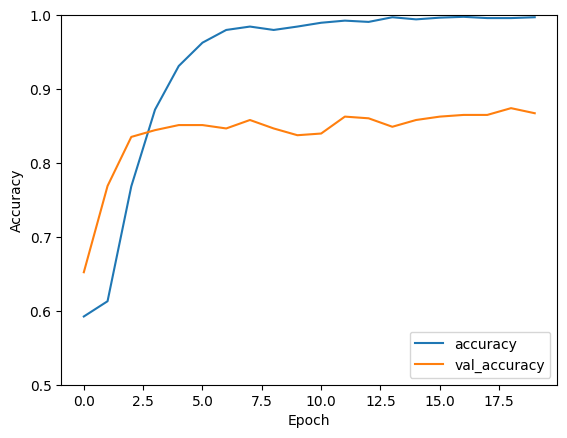

In [30]:
# evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_test,  labels_test, verbose=2)

In [31]:
print(test_acc)

0.8672769069671631
